# Stack OverFlow Developer Survey 2019 Data Analysis

### Following Kernel studies and analyses the following major topics with visaulizations

* **Top Programming languages and Databases that are presently in use**
* **Top Programming languages and Databases that have most demand and tech professionals desire to learn next year**
* **Gender Demographics in the Technology Industry**
* **Technology Skill Gap among Countries**

### Purpose of Data Analysis:
1. What are the top programming languages in demand?
2. What are the top database skills in demand?
3. What are the popular IDEs?

### Target Audience:
* Software Developers, Software Engineering Manager/Lead, HR Managers


### Link to the Dashboard containing all important visualizations

https://dataplatform.cloud.ibm.com/dashboards/4e16259b-c517-4972-a6cf-a59b97b80a20/view/4c03dc20348908e047cbc0e4079d24507533210bb4bb855588857b4909357597f0681796c827435b8e440630a6ea1a58c0

#### Learnings of the Data Analysis were the following:
1. Top Programming Languages currently in use are Javascript, HTML/CSS, SQL, PowerShell and Python.
2. Top Programming Languages people desire to learn next year are Javascript, Python, HTML/CSS, SQL and Typescript.
3. Top Databases currently in use are MySQL, PostgreSQL, MicrosoftSQLServer, SQLite and MongoDB.
4. Top Databases currently people desire to learn next year are PostgreSQL, MongoDB, Radia, MySQL and Elasticsearch.
5. Top platforms currently in use and people desire to learn are Windows and Linux.
6. Similarly, top Webframeworks currently in use and are desired to learn are jQuery, React.js and Angular.js.
7. More than 80% of tech professionals are men and there exists a huge gender disparity in tech industry.
8. USA has the most number of skilled professionals in Tech field.
9. Majority of Tech profressionals atleast have educational level of Bachelors degree or above.. 
10. Tech professionals are mostly young with a median age of 29 Years.
11. Median annual compensation of Tech professionals globally is USD 57745

## Collecting Jobs Data using Jobs API

### Determining the number of jobs currently open for various technologies  and for various locations


In [2]:
#Import required libraries
import requests
import pandas as pd
import json

JSON URL

In [3]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01'

In [4]:
response=requests.get(url)
jobs=response.json()

#### Writing a function to get number of jobs for a particular technology

In [5]:
api_url="http://127.0.0.1:5000/data"
def get_number_of_jobs_T(technology):
    number_of_jobs = 0
    payload={"Key Skills":technology}
    r=requests.get(api_url,params=payload)
    if r.ok: # if all is well() no errors, no network timeouts)
        data = r.json() 
        number_of_jobs += len(data)
    else:
        number_of_jobs += len(data)     
    return technology,number_of_jobs

Checking the function with Python technology

In [6]:
get_number_of_jobs_T("Python")

('Python', 1173)

#### Writing a function to find number of jobs in US for a location of our choice

In [7]:
def get_number_of_jobs_L(location):
    number_of_jobs = 0
    payload= {"Location":location}
    response = requests.get(api_url,params=payload)
    if response.ok: 
        data = response.json() 
        number_of_jobs += len(data)
    else:
        number_of_jobs += len(data)
        
    return location,number_of_jobs

Checking the function for Los Angeles location

In [8]:
get_number_of_jobs_L("Los Angeles")

('Los Angeles', 640)

### Storing the results in an excel file

Creating a list of all technologies to find their respective no of job postings

In [9]:
technologies = ['C','C#','C++','Java','JavaScript','Python','Scala','Oracle','SQL Server','MySQL Server','PostgreSQL','MongoDB']
technologies

['C',
 'C#',
 'C++',
 'Java',
 'JavaScript',
 'Python',
 'Scala',
 'Oracle',
 'SQL Server',
 'MySQL Server',
 'PostgreSQL',
 'MongoDB']

In [10]:
!pip3 install openpyxl
from openpyxl import Workbook

Defaulting to user installation because normal site-packages is not writeable


In [11]:
wb=Workbook()
ws=wb.active

Finding number of job postings for each technology in the list

In [12]:
ws.append(['Technology','Number_of_Jobs'])

for i in technologies:
    ws.append(get_number_of_jobs_T(i))

In [13]:
wb.save("job-postings.xlsx")

Creating a list of all locations to find their respective number of job postings

In [14]:
location=['Los Angeles','New York','San Francisco','Washington DC','Seattle','Austin','Detroit']

In [15]:
wb1=Workbook()
ws=wb1.active

In [16]:
ws.append(['Location Name','Number of Jobs'])

for i in location:
    ws.append(get_number_of_jobs_L(i))

In [17]:
wb1.save("job-postings-loc.xlsx")

## Extracting information from a given web site

In [18]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

### Importing required libraries

In [19]:
from bs4 import BeautifulSoup
import requests

In [20]:
data  = requests.get(url).text

Creating Soup object

In [21]:
soup = BeautifulSoup(data,"lxml")

In [22]:
table = soup.find('table')
language_name = []
annual_average_salary =[]
for row in table.find_all('tr'): # in html table row is represented by the tag <tr>
    # Get all columns in each row.
    lang = row.find_all('td') # in html a column is represented by the tag <td>
    language_name.append(lang[1].getText()) # store the value in column 2 as Language in language_name list
    annual_average_salary.append(lang[3].getText())

In [23]:
dic = {"Language":language_name, "Average Annual Salary":annual_average_salary} #create a dictionary 
import pandas as pd
df = pd.DataFrame(dic) # convert the dict. to a pandas dataframe.
df.drop(0,axis=0,inplace=True)
df

,Language,Average Annual Salary
1,Python,"$114,383"
2,Java,"$101,013"
3,R,"$92,037"
4,Javascript,"$110,981"
5,Swift,"$130,801"
6,C++,"$113,865"
7,C#,"$88,726"
8,PHP,"$84,727"
9,SQL,"$84,793"
10,Go,"$94,082"


Converting dataframe to csv file

In [24]:
df.to_csv("popular-languages.csv")

## Exploring Data

In [25]:
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"

In [26]:
df=pd.read_csv('m1_survey_data.csv')

#### Viewing data

In [27]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


Checking rows and columns

In [28]:
df.shape[0]

11552

In [29]:
df.shape[1]

85

Checking datatypes and null count

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11552 entries, 0 to 11551
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11552 non-null  int64  
 1   MainBranch              11552 non-null  object 
 2   Hobbyist                11552 non-null  object 
 3   OpenSourcer             11552 non-null  object 
 4   OpenSource              11471 non-null  object 
 5   Employment              11552 non-null  object 
 6   Country                 11552 non-null  object 
 7   Student                 11499 non-null  object 
 8   EdLevel                 11436 non-null  object 
 9   UndergradMajor          10812 non-null  object 
 10  EduOther                11388 non-null  object 
 11  OrgSize                 11454 non-null  object 
 12  DevType                 11485 non-null  object 
 13  YearsCode               11543 non-null  object 
 14  Age1stCode              11539 non-null

#### Checking mean of Age column

In [31]:
df['Age'].mean()

30.77239449133718

In [32]:
df['Country'].value_counts()

United States        3173
India                 911
United Kingdom        841
Germany               715
Canada                442
                     ... 
Liechtenstein           1
Rwanda                  1
Brunei Darussalam       1
Cape Verde              1
Iraq                    1
Name: Country, Length: 135, dtype: int64

## Data Wrangling

Importing required libraries

In [33]:
import numpy as np

###  Finding duplicates

In [34]:
df['Respondent'].duplicated().sum()

154

In [35]:
duplicateNo=df.duplicated(subset=None,keep='first').sum()
duplicateNo

154

### Removing duplicates

In [36]:
df.drop_duplicates(keep='first',inplace=True)

In [37]:
df.shape

(11398, 85)

### Finding Missing values

In [38]:
df.isnull().sum()

Respondent        0
MainBranch        0
Hobbyist          0
OpenSourcer       0
OpenSource       81
               ... 
Sexuality       542
Ethnicity       675
Dependents      140
SurveyLength     19
SurveyEase       14
Length: 85, dtype: int64

### Imputing Missing Values

In [39]:
df['WorkLoc'].value_counts()

Office                                            6806
Home                                              3589
Other place, such as a coworking space or cafe     971
Name: WorkLoc, dtype: int64

In [40]:
df['Employment'].value_counts()

Employed full-time    10968
Employed part-time      430
Name: Employment, dtype: int64

In [41]:
df['WorkLoc']=df['WorkLoc'].replace(np.nan,'Office')

In [42]:
df['Employment']=df['Employment'].replace(np.nan,'Employed full-time')

### Normalizing Data

In [43]:
df['CompFreq'].value_counts()

Yearly     6073
Monthly    4788
Weekly      331
Name: CompFreq, dtype: int64

In [44]:
df["CompFreq"].replace(to_replace="Yearly",value=1,inplace=True)
df["CompFreq"].replace(to_replace="Monthly",value=12,inplace=True)
df["CompFreq"].replace(to_replace="Weekly",value=52,inplace=True)

In [45]:
df["CompFreq"].value_counts()

1.0     6073
12.0    4788
52.0     331
Name: CompFreq, dtype: int64

In [46]:
df['NormalizedAnnualCompensation'] = df["CompTotal"] * df["CompFreq"]
df

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,NormalizedAnnualCompensation
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,61000.0
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,138000.0
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy,90000.0
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,348000.0
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy,90000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11547,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Cour...,36.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Difficult,130000.0
11548,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Tech...,25.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,74400.0
11549,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,34.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Easy,105000.0
11550,25141,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Switzerland,No,"Secondary school (e.g. American high school, G...",NaN,...,NaN,25.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,80000.0


## Exploratory Data Analysis

Importing Visualization Libraries

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

In [274]:
df = pd.read_csv("m2_survey_data.csv")

Median Salary

In [49]:
df['ConvertedComp'].median()

57745.0

In [50]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


### Determining how the data is distributed

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


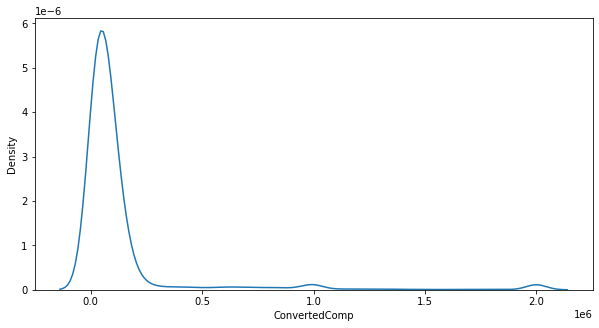

In [51]:
plt.figure(figsize=(10,5))
sns.distplot(a=df["ConvertedComp"],bins=20,hist=False)
plt.show()

Plot the histogram for the column ConvertedComp

(array([2.054e+03, 1.703e+03, 1.698e+03, 1.447e+03, 1.024e+03, 6.880e+02,
        4.790e+02, 3.250e+02, 1.570e+02, 8.400e+01, 6.800e+01, 3.800e+01,
        3.300e+01, 1.600e+01, 7.000e+00, 2.600e+01, 8.000e+00, 1.200e+01,
        1.700e+01, 1.300e+01, 1.900e+01, 1.100e+01, 1.200e+01, 7.000e+00,
        1.600e+01, 6.000e+00, 9.000e+00, 1.300e+01, 1.100e+01, 1.100e+01,
        1.700e+01, 1.500e+01, 2.000e+01, 3.000e+00, 1.400e+01, 1.300e+01,
        8.000e+00, 1.400e+01, 5.000e+00, 1.600e+01, 6.000e+00, 1.300e+01,
        1.400e+01, 1.300e+01, 4.000e+00, 1.000e+00, 8.000e+00, 1.100e+01,
        2.000e+01, 9.000e+00, 1.060e+02, 1.000e+00, 2.000e+00, 1.000e+00,
        6.000e+00, 3.000e+00, 1.000e+00, 4.000e+00, 7.000e+00, 0.000e+00,
        9.000e+00, 2.000e+00, 1.000e+00, 4.000e+00, 0.000e+00, 0.000e+00,
        1.400e+01, 1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        7.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        5.000e+00, 0.000e+00, 1.000e+0

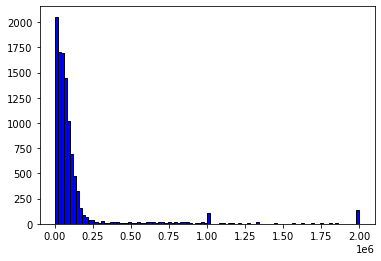

In [52]:
plt.hist(df['ConvertedComp'], color = 'blue', edgecolor = 'black', bins =100)

Count of Respondents by Gender

In [53]:
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Median Converted Compensation of Woman Respondents

In [54]:
df[df['Gender']=='Woman']['ConvertedComp'].median()

57708.0

In [55]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plotting a histogram of column Age

(array([3.800e+01, 3.900e+02, 1.666e+03, 2.182e+03, 1.485e+03, 1.670e+03,
        1.271e+03, 8.670e+02, 4.190e+02, 3.990e+02, 2.450e+02, 1.980e+02,
        8.600e+01, 9.900e+01, 4.000e+01, 2.500e+01, 2.200e+01, 2.000e+00,
        2.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([16.        , 18.76666667, 21.53333333, 24.3       , 27.06666667,
        29.83333333, 32.6       , 35.36666667, 38.13333333, 40.9       ,
        43.66666667, 46.43333333, 49.2       , 51.96666667, 54.73333333,
        57.5       , 60.26666667, 63.03333333, 65.8       , 68.56666667,
        71.33333333, 74.1       , 76.86666667, 79.63333333, 82.4       ,
        85.16666667, 87.93333333, 90.7       , 93.46666667, 96.23333333,
        99.        ]),
 <BarContainer object of 30 artists>)

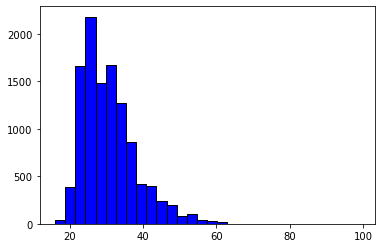

In [56]:
plt.hist(df['Age'], color = 'blue', edgecolor = 'black', bins =30)

## Outliers

### Finding outliers

Finding outliers for different columns using boxplot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ConvertedComp'>

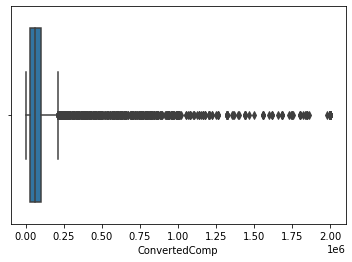

In [57]:
sns.boxplot(df['ConvertedComp'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

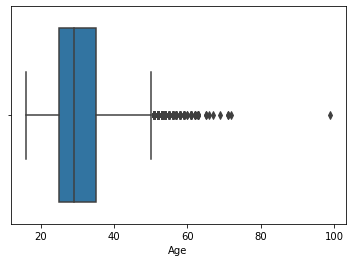

In [58]:
sns.boxplot(df['Age'])

Finding the Inter Quartile Range for the column ConvertedComp

In [59]:
q1=df['ConvertedComp'].quantile(0.25)
q3=df['ConvertedComp'].quantile(0.75)
IQR=q3-q1
print('IQR:',(IQR))

IQR: 73132.0


Upper and lower bounds

In [60]:
upper=q3+1.5*IQR
lower=q1-1.5*IQR

In [61]:
outliers = (df["ConvertedComp"] < lower) | (df["ConvertedComp"] > upper)
outliers.value_counts()

False    10519
True       879
Name: ConvertedComp, dtype: int64

Creating new dataframe by removing outliers from ConvertedComp column

In [62]:
df1=df[(df['ConvertedComp']>lower)&(df['ConvertedComp']<upper)]
df1

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11392,25134,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ecuador,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Somewhat less welcome now than last year,Tech articles written by other developers,32.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,No,Appropriate in length,Easy
11393,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Cour...,36.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Difficult
11394,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Tech...,25.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
11395,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer

In [63]:
df1['ConvertedComp'].median()

52704.0

In [64]:
df1['ConvertedComp'].mean()

59883.20838915799

## Correlation

### Finding correlation

In [65]:
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


## Data Visualization

In [91]:
!wget --no-check-certificate https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2022-07-23 17:11:05--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: 'm4_survey_data.sqlite.7'

     0K .......... .......... .......... .......... ..........  0% 65.8K 9m3s
    50K .......... .......... .......... .......... ..........  0% 99.2K 7m31s
   100K .......... .......... .......... .......... ..........  0%  199K 6m0s
   150K .......... .......... .......... .......... ..........  0% 12.7M 4m31s
   200K .......... .......... .......... .......... ..........  0%  205K 4m11s
   25

  8700K .......... .......... .......... .......... .......... 24% 71.3M 61s
  8750K .......... .......... .......... .......... .......... 24% 38.1M 60s
  8800K .......... .......... .......... .......... .......... 24% 67.1M 60s
  8850K .......... .......... .......... .......... .......... 24% 77.5M 59s
  8900K .......... .......... .......... .......... .......... 24% 64.2M 59s
  8950K .......... .......... .......... .......... .......... 25%  198K 59s
  9000K .......... .......... .......... .......... .......... 25% 35.6M 59s
  9050K .......... .......... .......... .......... .......... 25%  350K 59s
  9100K .......... .......... .......... .......... .......... 25% 76.5M 58s
  9150K .......... .......... .......... .......... .......... 25% 38.8M 58s
  9200K .......... .......... .......... .......... .......... 25% 1.40M 58s
  9250K .......... .......... .......... .......... .......... 25% 2.21M 57s
  9300K .......... .......... .......... .......... .......... 26% 1.15M 57s

Connecting to a database

In [92]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite.3")

No of rows in the table master

In [93]:
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


Listing all tables in the database

In [94]:
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


### Visualizing distribution of data

### Histograms

Plotting histogram of ConvertedComp

In [95]:
QUERY = """
SELECT ConvertedComp ,COUNT(*) as count
FROM master
group by ConvertedComp
"""
df1=pd.read_sql_query(QUERY,conn)
df1.head()

,ConvertedComp,count
0,NaN,816
1,0.0,26
2,4.0,1
3,5.0,1
4,10.0,2


(array([1.62e+03, 9.29e+02, 4.00e+02, 1.59e+02, 6.80e+01, 3.80e+01,
        2.40e+01, 1.80e+01, 1.20e+01, 2.30e+01, 1.50e+01, 1.30e+01,
        1.00e+01, 1.10e+01, 1.20e+01, 1.10e+01, 1.40e+01, 1.00e+01,
        1.20e+01, 1.40e+01, 1.30e+01, 1.60e+01, 5.00e+00, 1.20e+01,
        1.20e+01, 3.00e+00, 2.00e+00, 3.00e+00, 3.00e+00, 2.00e+00,
        2.00e+00, 2.00e+00, 0.00e+00, 2.00e+00, 3.00e+00, 1.00e+00,
        2.00e+00, 1.00e+00, 0.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        1.00e+00, 4.00e+00, 0.00e+00, 3.00e+00, 4.00e+00, 0.00e+00,
        0.00e+00, 2.00e+00]),
 array([      0.,   40000.,   80000.,  120000.,  160000.,  200000.,
         240000.,  280000.,  320000.,  360000.,  400000.,  440000.,
         480000.,  520000.,  560000.,  600000.,  640000.,  680000.,
         720000.,  760000.,  800000.,  840000.,  880000.,  920000.,
         960000., 1000000., 1040000., 1080000., 1120000., 1160000.,
        1200000., 1240000., 1280000., 1320000., 1360000., 1400000.,
        1440000., 

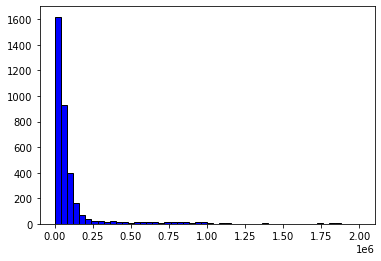

In [96]:
plt.hist(df1['ConvertedComp'],color='blue',edgecolor='black',bins=50)

### Box Plots

Box plot of Age

In [97]:
QUERY = """
SELECT Age FROM master
"""
df2=pd.read_sql_query(QUERY,conn)
df2.head()

,Age
0,22.0
1,23.0
2,28.0
3,26.0
4,29.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

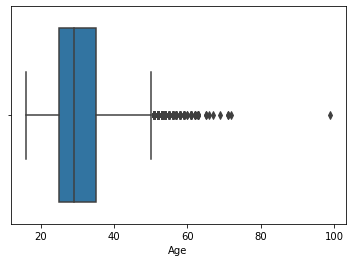

In [98]:
sns.boxplot(df2['Age'])

## Visualizing relationships in data

### Scatter Plots

Scatterplot of Age and Workweekhrs

In [99]:
QUERY = """
SELECT Age ,WorkWeekHrs FROM master
"""
df3=pd.read_sql_query(QUERY,conn)
df3.head()

,Age,WorkWeekHrs
0,22.0,80.0
1,23.0,32.0
2,28.0,40.0
3,26.0,40.0
4,29.0,45.0


<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

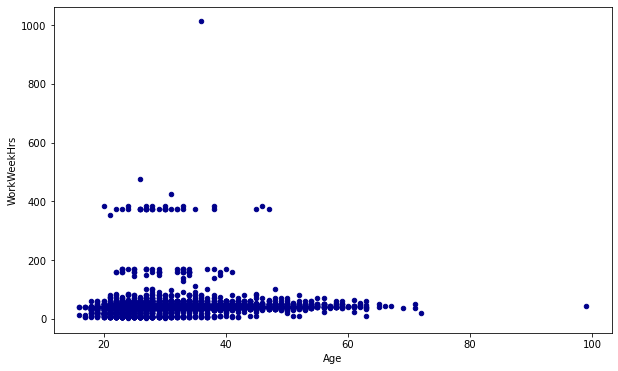

In [100]:
df3.plot(kind='scatter', x='Age', y='WorkWeekHrs', figsize=(10, 6), color='darkblue')

### Bubble Plots

bubble plot of WorkWeekHrs and CodeRevHrs with Age as bubble size

In [101]:
QUERY = """
SELECT Age ,WorkWeekHrs,CodeRevHrs FROM master
"""
df4=pd.read_sql_query(QUERY,conn)
df4.head()

,Age,WorkWeekHrs,CodeRevHrs
0,22.0,80.0,NaN
1,23.0,32.0,12.0
2,28.0,40.0,5.0
3,26.0,40.0,NaN
4,29.0,45.0,5.0


In [102]:
norm_age = (df4['Age'] - df4['Age'].min()) / (df4['Age'].max() - df4['Age'].min())

<AxesSubplot:xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

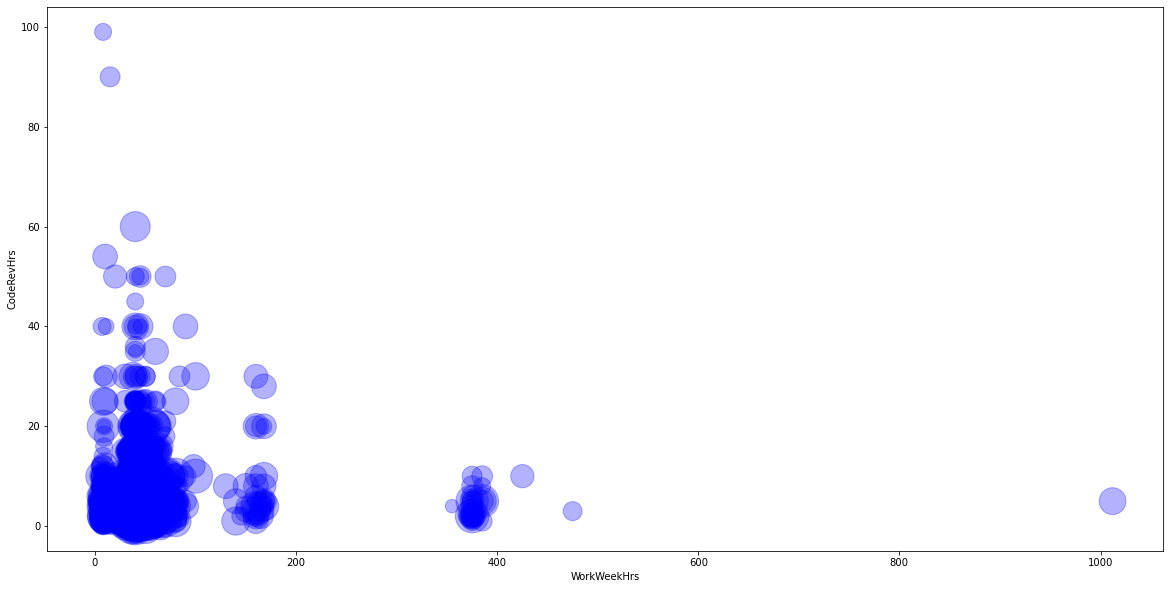

In [233]:
df4.plot(kind='scatter', x='WorkWeekHrs', y='CodeRevHrs',s=norm_age*3000, figsize=(20, 10), color='blue',alpha=0.3)

## Visualizing composition of data

### Pie Charts

Pie chart of the top 5 databases that respondents wish to learn next year.

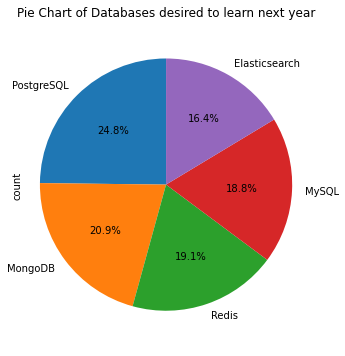

In [104]:
Query="""
SELECT DatabaseDesireNextYear, count(*) as count
FROM DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by count desc limit 5
"""

df5=pd.read_sql_query(Query, conn)
label=df5['DatabaseDesireNextYear']
df5['count'].plot(kind='pie',
                    figsize=(5, 6),
                    autopct='%1.1f%%', # add in percentages
                    labels=label,
                    startangle=90,     # start angle 90° (Africa)
                    shadow=False,       # add shadow      
                    )

plt.title('Pie Chart of Databases desired to learn next year')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

### Stacked Charts

Stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35

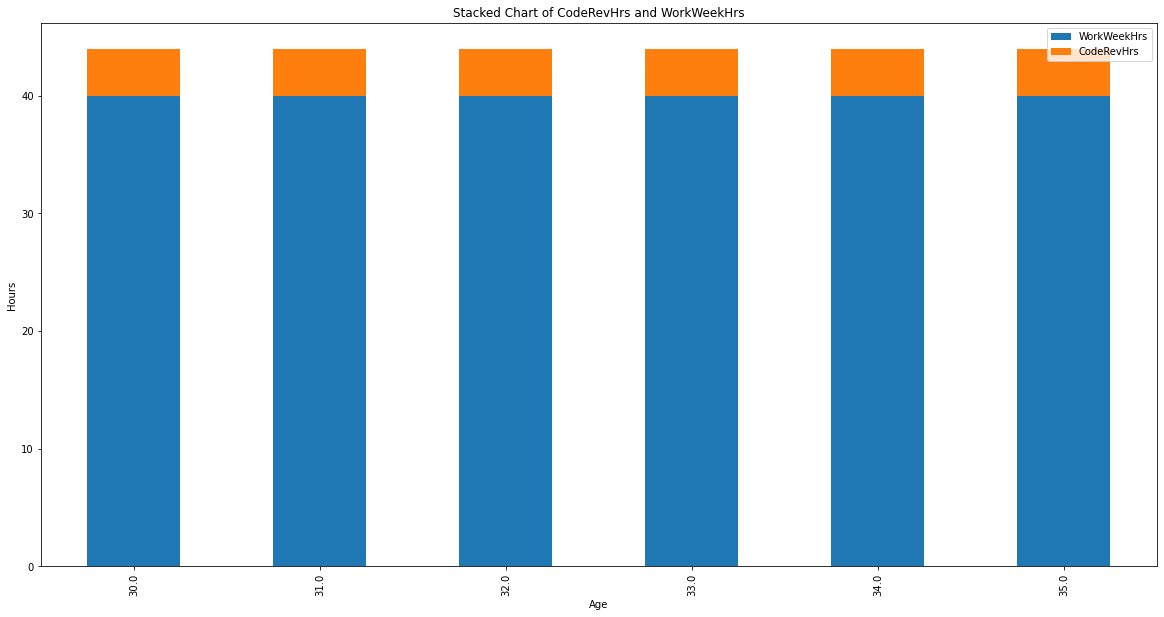

In [105]:
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
WHERE Age BETWEEN 30 and 35
"""
df6 = pd.read_sql_query(QUERY,conn)
new_df = df6.groupby(df6['Age']).median()
new_df.plot(kind='bar',
        stacked=True,
        figsize=(20, 10))  # pass a tuple (x, y) size

plt.title('Stacked Chart of CodeRevHrs and WorkWeekHrs')
plt.ylabel('Hours')
plt.xlabel('Age')

plt.show()

## Visualizing comparison of data

### Line Chart

Median ConvertedComp for all ages from 45 to 60

In [106]:
QUERY = """
SELECT ConvertedComp, Age
FROM master
WHERE Age BETWEEN 45 and 60
"""
df7 = pd.read_sql_query(QUERY,conn)
new_df_1 = df7.groupby(df7['Age']).median()
new_df_1

,ConvertedComp
Age,
45.0,90330.0
46.0,91593.0
47.0,91606.0
48.0,105750.0
49.0,85248.0
50.0,95000.0
51.0,100000.0
52.0,105500.0
53.0,100463.0


<AxesSubplot:xlabel='Age'>

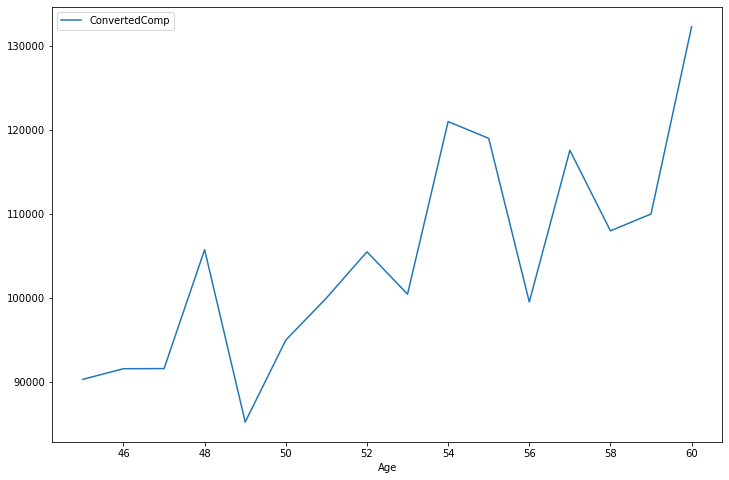

In [107]:
new_df_1.plot(kind = 'line', figsize = (12,8))

### Bar Chart

horizontal bar chart using column MainBranch.

<AxesSubplot:>

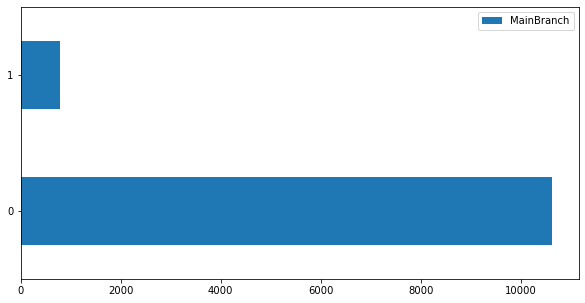

In [273]:
QUERY = """
SELECT MainBranch, COUNT(*) as MainBranch
from master
group by MainBranch
"""
df7 = pd.read_sql_query(QUERY,conn)
df7.plot(kind = 'barh', figsize = (10,5))

## Present Technology Usage Trend

### Top Programming languages used

In [177]:
QUERY = """
SELECT *
from LanguageWorkedWith
"""
df8 = pd.read_sql_query(QUERY,conn)
df8

,Respondent,LanguageWorkedWith
0,4,C
1,4,C++
2,4,C#
3,4,Python
4,4,SQL
...,...,...
59787,25142,Go
59788,25142,HTML/CSS
59789,25142,PHP
59790,25142,Python


In [178]:
TopLang=pd.DataFrame(df8['LanguageWorkedWith'].value_counts())

In [179]:
TopLang.reset_index(inplace=True)

In [180]:
TopLang.rename(columns={'index':'LanguageWorkedWith','LanguageWorkedWith':'Respondent Count'},inplace=True)

In [181]:
TopLang=TopLang[:10]

In [182]:
TopLang

,LanguageWorkedWith,Respondent Count
0,JavaScript,8687
1,HTML/CSS,7830
2,SQL,7106
3,Bash/Shell/PowerShell,4642
4,Python,4542
5,Java,4506
6,C#,4288
7,TypeScript,3232
8,PHP,2913
9,C++,1946


Text(0.5, 1.0, 'Top 10 languages worked with')

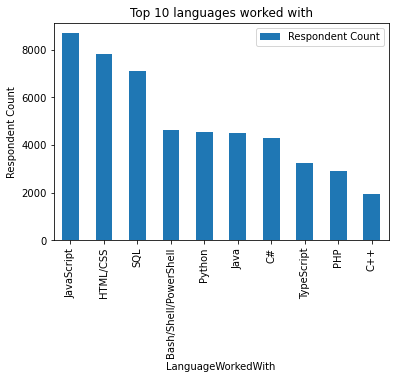

In [186]:
TopLang.plot.bar(x='LanguageWorkedWith', y='Respondent Count')
plt.ylabel('Respondent Count')
plt.title('Top 10 languages worked with')

### Top Databases worked with

In [165]:
QUERY = """
SELECT *
from DatabaseWorkedWith
"""
df9 = pd.read_sql_query(QUERY,conn)
df9

,Respondent,DatabaseWorkedWith
0,4,MySQL
1,4,SQLite
2,9,DynamoDB
3,9,PostgreSQL
4,9,SQLite
...,...,...
31370,25137,MySQL
31371,25138,PostgreSQL
31372,25141,Microsoft SQL Server
31373,25141,Redis


In [166]:
TopDB=pd.DataFrame(df9['DatabaseWorkedWith'].value_counts())

In [167]:
TopDB.reset_index(inplace=True)

In [168]:
TopDB.rename(columns={'index':'DatabaseWorkedWith','DatabaseWorkedWith':'Respondent Count'},inplace=True)

In [169]:
TopDB=TopDB[0:10]

Text(0.5, 1.0, 'Top 10 Databases worked with')

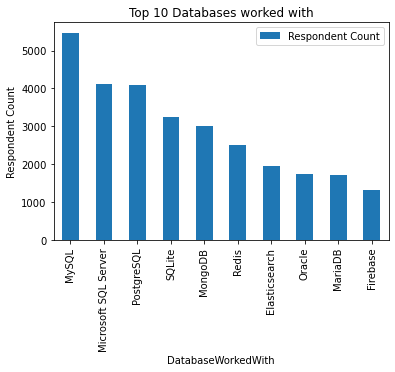

In [170]:
TopDB.plot.bar(x='DatabaseWorkedWith',y='Respondent Count')
plt.ylabel('Respondent Count')
plt.title('Top 10 Databases worked with')

### Top Platform worked with

In [187]:
QUERY = """
SELECT *
from PlatformWorkedWith
"""
df10 = pd.read_sql_query(QUERY,conn)
df10

,Respondent,PlatformWorkedWith
0,4,Linux
1,4,Windows
2,9,AWS
3,9,Docker
4,9,Heroku
...,...,...
39203,25141,Android
39204,25141,iOS
39205,25141,Windows
39206,25142,Linux


In [191]:
TopPlatform=pd.DataFrame(df10['PlatformWorkedWith'].value_counts())

In [193]:
list1=list(df10['PlatformWorkedWith'])

In [194]:
list1

['Linux',
 'Windows',
 'AWS',
 'Docker',
 'Heroku',
 'Linux',
 'MacOS',
 'Slack',
 'Android',
 'AWS',
 'Docker',
 'IBM Cloud or Watson',
 'iOS',
 'Linux',
 'MacOS',
 'Microsoft Azure',
 'Slack',
 'Windows',
 'WordPress',
 'Arduino',
 'Docker',
 'Heroku',
 'Raspberry Pi',
 'WordPress',
 'Android',
 'AWS',
 'Microsoft Azure',
 'Android',
 'Docker',
 'Windows',
 'WordPress',
 'Docker',
 'Linux',
 'Raspberry Pi',
 'Windows',
 'Docker',
 'Google Cloud Platform',
 'AWS',
 'WordPress',
 'Linux',
 'Windows',
 'AWS',
 'Docker',
 'Linux',
 'MacOS',
 'Microsoft Azure',
 'Windows',
 'WordPress',
 'Windows',
 'AWS',
 'Docker',
 'Kubernetes',
 'Linux',
 'Microsoft Azure',
 'Windows',
 'Android',
 'Arduino',
 'iOS',
 'MacOS',
 'Raspberry Pi',
 'Slack',
 'Windows',
 'WordPress',
 'Linux',
 'Windows',
 'Android',
 'Arduino',
 'AWS',
 'Docker',
 'Linux',
 'Slack',
 'Windows',
 'Arduino',
 'AWS',
 'Heroku',
 'Linux',
 'MacOS',
 'Raspberry Pi',
 'WordPress',
 'AWS',
 'Docker',
 'Docker',
 'Linux',
 'MacOS

In [196]:
text1=' '.join(list1)

In [200]:
from wordcloud import WordCloud

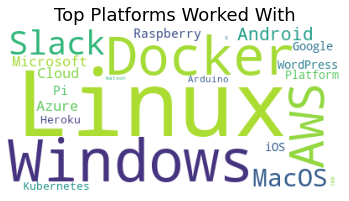

In [237]:
wordcloud1 = WordCloud(background_color='white', collocations=False).generate(text1)
# Generate plot
plt.imshow(wordcloud1)
plt.axis("off")
plt.title('Top Platforms Worked With', fontsize=18)
plt.show()

### Top WebFrameWorks worked with

In [207]:
QUERY = """
SELECT *
from WebframeWorkedWith
"""
df11 = pd.read_sql_query(QUERY,conn)
df11

,Respondent,WebFrameWorkedWith
0,9,Express
1,9,Ruby on Rails
2,9,Other(s):
3,13,Angular/Angular.js
4,13,ASP.NET
...,...,...
24798,25136,jQuery
24799,25141,Angular/Angular.js
24800,25141,ASP.NET
24801,25141,jQuery


In [218]:
TopWebframe=pd.DataFrame(df11['WebFrameWorkedWith'].value_counts())

In [219]:
TopWebframe.reset_index(inplace=True)

In [220]:
TopWebframe.rename(columns={'index':'WebFrameWorkedWith','WebFrameWorkedWith':'Respondent Count'},inplace=True)

In [221]:
TopWebframe

,WebFrameWorkedWith,Respondent Count
0,jQuery,4629
1,Angular/Angular.js,3327
2,React.js,3302
3,ASP.NET,3042
4,Express,2028
5,Spring,1728
6,Vue.js,1485
7,Flask,1186
8,Django,1176
9,Laravel,939


Text(0.5, 1.0, 'Percentage BreakUp of WebFrameWorks worked with')

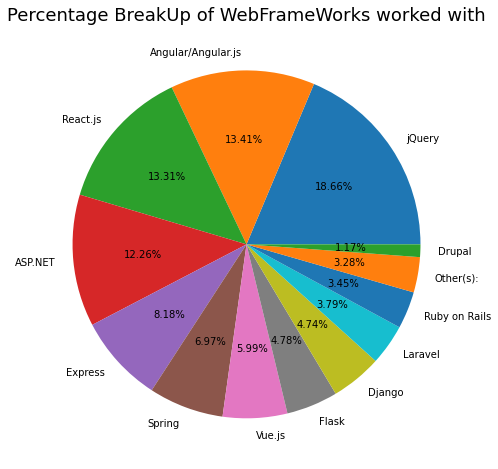

In [239]:
plt.figure(figsize=(8,8))
plt.pie(TopWebframe['Respondent Count'], labels=TopWebframe['WebFrameWorkedWith'],autopct='%1.2f%%')
plt.title('Percentage BreakUp of WebFrameWorks worked with',fontsize=18)

## Future Technology Trend

### Top Programming languages desired to learn next year

In [240]:
QUERY = """
SELECT *
from LanguageDesireNextYear
"""
df12 = pd.read_sql_query(QUERY,conn)
df12

,Respondent,LanguageDesireNextYear
0,4,C
1,4,C#
2,4,JavaScript
3,4,SQL
4,9,Bash/Shell/PowerShell
...,...,...
55759,25142,Bash/Shell/PowerShell
55760,25142,C
55761,25142,C++
55762,25142,Python


In [245]:
TopLDesire=pd.DataFrame(df12['LanguageDesireNextYear'].value_counts())

In [246]:
TopLDesire.reset_index(inplace=True)

In [247]:
TopLDesire.rename(columns={'index':'LanguageDesireNextYear','LanguageDesireNextYear':'Respondent Count'},inplace=True)

In [248]:
TopLDesire=TopLDesire[0:10]

Text(0.5, 1.0, 'Top 10 Languages desired to learn Next Year')

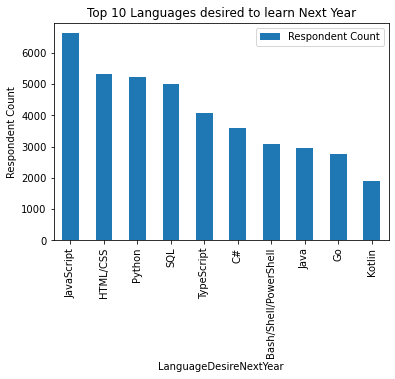

In [249]:
TopLDesire.plot.bar(x='LanguageDesireNextYear',y='Respondent Count')
plt.ylabel('Respondent Count')
plt.title('Top 10 Languages desired to learn Next Year')

In [250]:
QUERY = """
SELECT *
from DatabaseDesireNextYear
"""
df13 = pd.read_sql_query(QUERY,conn)
df13

,Respondent,DatabaseDesireNextYear
0,4,MySQL
1,4,SQLite
2,9,PostgreSQL
3,9,Redis
4,9,SQLite
...,...,...
29570,25141,Elasticsearch
29571,25141,MongoDB
29572,25141,Microsoft SQL Server
29573,25141,Redis


In [251]:
TopDBDesire=pd.DataFrame(df13['DatabaseDesireNextYear'].value_counts())

In [252]:
TopDBDesire.reset_index(inplace=True)

In [253]:
TopDBDesire.rename(columns={'index':'DatabaseDesireNextYear','DatabaseDesireNextYear':'Respondent Count'},inplace=True)

In [254]:
TopDBDesire=TopDBDesire[0:10]

Text(0.5, 1.0, 'Top 10 Databases desired to learn next year')

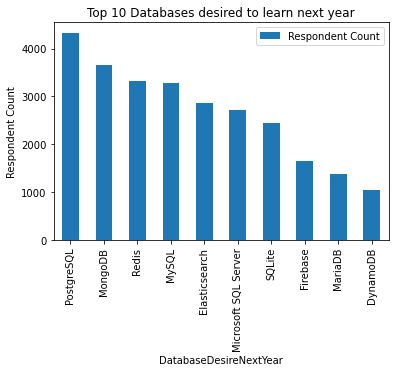

In [255]:
TopDBDesire.plot.bar(x='DatabaseDesireNextYear',y='Respondent Count')
plt.ylabel('Respondent Count')
plt.title('Top 10 Databases desired to learn next year')

### Top Platforms desired to learn Next Year

In [256]:
QUERY = """
SELECT *
from PlatformDesireNextYear
"""
df14 = pd.read_sql_query(QUERY,conn)
df14

,Respondent,PlatformDesireNextYear
0,4,Linux
1,4,Windows
2,9,AWS
3,9,Docker
4,9,Heroku
...,...,...
44309,25141,Kubernetes
44310,25141,Windows
44311,25142,Docker
44312,25142,Linux


In [257]:
TopPfDesire=pd.DataFrame(df14['PlatformDesireNextYear'].value_counts())

In [258]:
TopPfDesire.reset_index(inplace=True)

In [259]:
TopPfDesire.rename(columns={'index':'PlatformDesireNextYear','PlatformDesireNextYear':'Respondent Count'},inplace=True)

In [260]:
TopPfDesire=TopPfDesire[0:10]

In [261]:
list2=list(df14['PlatformDesireNextYear'])

In [262]:
text2=' '.join(list2)

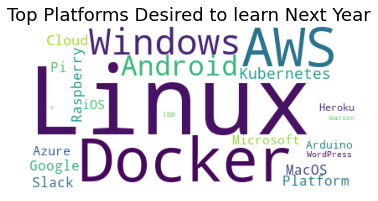

In [264]:
wordcloud2 = WordCloud(background_color='white', collocations=False).generate(text2)
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.title('Top Platforms Desired to learn Next Year', fontsize=18)
plt.show()

### Top WebFrameWorks desired to learn Next Year

In [265]:
QUERY = """
SELECT *
from WebFrameDesireNextYear
"""
df15 = pd.read_sql_query(QUERY,conn)
df15

,Respondent,WebFrameDesireNextYear
0,9,Express
1,9,Ruby on Rails
2,9,Other(s):
3,13,Express
4,13,Vue.js
...,...,...
24562,25136,Vue.js
24563,25137,jQuery
24564,25141,Angular/Angular.js
24565,25141,ASP.NET


In [266]:
TopWebframeDesire=pd.DataFrame(df15['WebFrameDesireNextYear'].value_counts())

In [269]:
TopWebframeDesire.reset_index(inplace=True)

In [270]:
TopWebframeDesire.rename(columns={'index':'WebFrameDesireNextYear','WebFrameDesireNextYear':'Respondent Count'},inplace=True)

Text(0.5, 1.0, 'Percentage BreakUp of WebFrameWorks desired to learn next year')

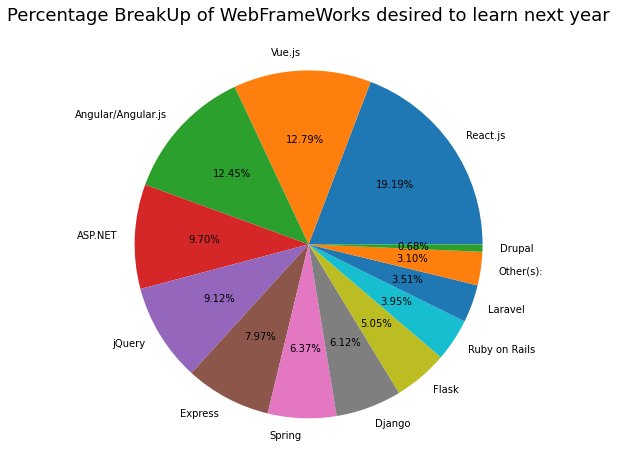

In [271]:
plt.figure(figsize=(8,8))
plt.pie(TopWebframeDesire['Respondent Count'], labels=TopWebframeDesire['WebFrameDesireNextYear'],autopct='%1.2f%%')
plt.title('Percentage BreakUp of WebFrameWorks desired to learn next year',fontsize=18)